In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

import os

# Load AnnData

In [2]:
adata_path = os.path.expanduser("~/SSS_mount/insituCNV/Simulated_data/Xenium_HumanLymphNode_5K.h5ad")
adata = sc.read_h5ad(adata_path)

In [3]:
adata

AnnData object with n_obs × n_vars = 708983 × 4624
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'leiden', 'group'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'group_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

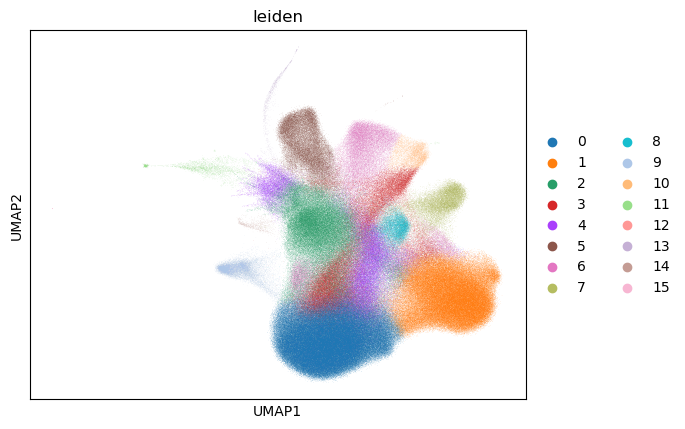

In [4]:
sc.pl.umap(adata, color = 'leiden')

# Save the raw gene count matrix to csv to use for SCEVAN analysis

In [12]:
raw_count_mtx = adata.layers["counts"].toarray()

In [14]:
adata.var

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
A2ML1,ENSG00000166535,Gene Expression,Unknown,734,0.001042,0.001042,99.896471,739.0,6.606650
AAMP,ENSG00000127837,Gene Expression,Unknown,57162,0.087365,0.083757,91.937465,61940.0,11.033937
AAR2,ENSG00000131043,Gene Expression,Unknown,17950,0.026349,0.026008,97.468204,18681.0,9.835316
AARSD1,ENSG00000266967,Gene Expression,Unknown,21433,0.031630,0.031140,96.976937,22425.0,10.017977
ABAT,ENSG00000183044,Gene Expression,Unknown,9165,0.013381,0.013292,98.707303,9487.0,9.157784
...,...,...,...,...,...,...,...,...,...
ZSCAN26,ENSG00000197062,Gene Expression,Unknown,25728,0.038160,0.037450,96.371140,27055.0,10.205664
ZSWIM6,ENSG00000130449,Gene Expression,Unknown,10264,0.014811,0.014703,98.552293,10501.0,9.259321
ZUP1,ENSG00000153975,Gene Expression,Unknown,18951,0.027869,0.027488,97.327016,19759.0,9.891415
ZYG11B,ENSG00000162378,Gene Expression,Unknown,22956,0.033400,0.032854,96.762123,23680.0,10.072429


In [ ]:
import modify_anndata_v1 as ma

adata.var['gene_names'] = adata.var_names

adata.var_names = adata.var['gene_ids']

ma.add_genomic_positions(adata=adata)

In [ ]:
adata